# Polynomial Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.chdir(r'C:\Users\acer\Desktop\P14-Machine-Learning-AZ-Template-Folder\Machine Learning A-Z Template Folder\Part 2 - Regression\Section 6 - Polynomial Regression\P14-Polynomial-Regression\Polynomial_Regression')

In [3]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


#### Independent and dependent variables.

In [5]:
X = dataset['Level'].values.reshape(-1,1)
y = dataset['Salary'].values

### Building a Simple Linear Regression model.

In [8]:
from sklearn.linear_model import LinearRegression

In [10]:
lin1 = LinearRegression()

In [11]:
lin1.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Building a Polynomial Regression model.

In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [13]:
poly_model = PolynomialFeatures(degree = 2)
X_poly = poly_model.fit_transform(X)
poly_model.fit(X_poly, y)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

##### The fit_transform adds new terms to the model like in our case, the quadratic term.

In [14]:
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

<p><i><mark>
    The First column represents the constant section,<br>
    the second column represents the linear section and <br>
    the third column represents the quadratic section.
    </mark></i></p>

In [15]:
# Creating a new linear regression object.
lin2 = LinearRegression()
lin2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Intercepts and Weights.

In [17]:
print('Intercept = ', lin2.intercept_.round(2), '\n', 'Weights = ', lin2.coef_.round(2))

Intercept =  232166.67 
 Weights =  [      0.   -132871.21   19431.82]


### Predictions using lin1 and lin2.

In [29]:
predictedbylin1 = lin1.predict(X)
predictedbylin2 = lin2.predict(X_poly)

### Using Plots.

In [18]:
lin2.predict(X_poly)

array([118727.27272727,  44151.51515151,   8439.39393939,  11590.90909091,
        53606.06060606, 134484.84848485, 254227.27272727, 412833.33333333,
       610303.03030303, 846636.36363636])

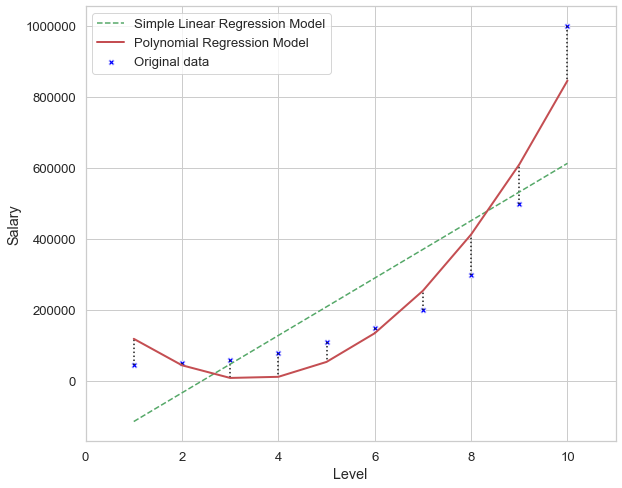

In [57]:
plt.figure(figsize = (9.5,8))
sns.set(style = 'whitegrid', font_scale = 1.2)

sns.scatterplot(x = dataset.Level, y = dataset.Salary, color = 'blue', marker = 'X', label = 'Original data')

#PLotting the straight line predicted by lin1 object.
plt.plot(X, lin1.predict(X), 'g--', label = 'Simple Linear Regression Model')

#PLotting the curve predicted by the lin2 object.
plt.plot(X, lin2.predict(X_poly), 'r', linewidth = 2, label = 'Polynomial Regression Model')


for ii in range(len(X)):
    plt.vlines(X[ii], y[ii], predictedbylin2[ii], linestyles = 'dotted')
    #plt.vlines(X_position, ymin, ymax)




plt.xlim(0,11)

plt.legend()
plt.show()

### Using a function to ease things up.

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# We define a function that returns a predicted value of the response variable given the degree of the polynomial is 'n'.
def myPolyFitter(X,y,n = 1):
    '''n = degree of the polynomial.'''
    poly_model = PolynomialFeatures(degree = n)
    X_poly = poly_model.fit_transform(X)
    poly_model.fit(X_poly, y)
    
    # Creating a new linear regression object.
    lin2 = LinearRegression()
    lin2.fit(X_poly,y)
    
    #Intercept and weights.
    #print('Intercept = ', lin2.intercept_.round(2), '\n', 'Weights = ', lin2.coef_.round(2))
    
    #Predictions.
    predictedbylin2 = lin2.predict(X_poly)
    
    return predictedbylin2
    

### Creating a dataframe to store all the predicted values upto order 'n'.

In [100]:
def createDataFrame(X,y,n = 1):
    myDF = pd.DataFrame()
    myDF['y'] = y
    for ii in range(1,n+1):
        #Inserting values into the data frame.
        #myDF['polynomial_degree'] = ii
        myDF[ii] = myPolyFitter(X,y,ii) 
    
    return myDF

In [101]:
polyfit_summary = createDataFrame(X,y,n = 4)
polyfit_summary = polyfit_summary.round(2)
polyfit_summary

,y,1,2,3,4
0,45000,-114454.55,118727.27,14902.10,53356.64
1,50000,-33575.76,44151.52,78759.91,31759.91
2,60000,47303.03,8439.39,94960.37,58642.19
3,80000,128181.82,11590.91,88223.78,94632.87
4,110000,209060.61,53606.06,83270.40,121724.94
5,150000,289939.39,134484.85,104820.51,143275.06
6,200000,370818.18,254227.27,177594.41,184003.50
7,300000,451696.97,412833.33,326312.35,289994.17
8,500000,532575.76,610303.03,575694.64,528694.64
9,1000000,613454.55,846636.36,950461.54,988916.08


#### Testing:

In [102]:
for ii in range(1,4+1):
    print(myPolyFitter(X,y,ii).round(2), '\n\n')

[-114454.55  -33575.76   47303.03  128181.82  209060.61  289939.39
  370818.18  451696.97  532575.76  613454.55] 


[118727.27  44151.52   8439.39  11590.91  53606.06 134484.85 254227.27
 412833.33 610303.03 846636.36] 


[ 14902.1   78759.91  94960.37  88223.78  83270.4  104820.51 177594.41
 326312.35 575694.64 950461.54] 


[ 53356.64  31759.91  58642.19  94632.87 121724.94 143275.06 184003.5
 289994.17 528694.64 988916.08] 




### Making a grand plot to summarize everything into one figure.

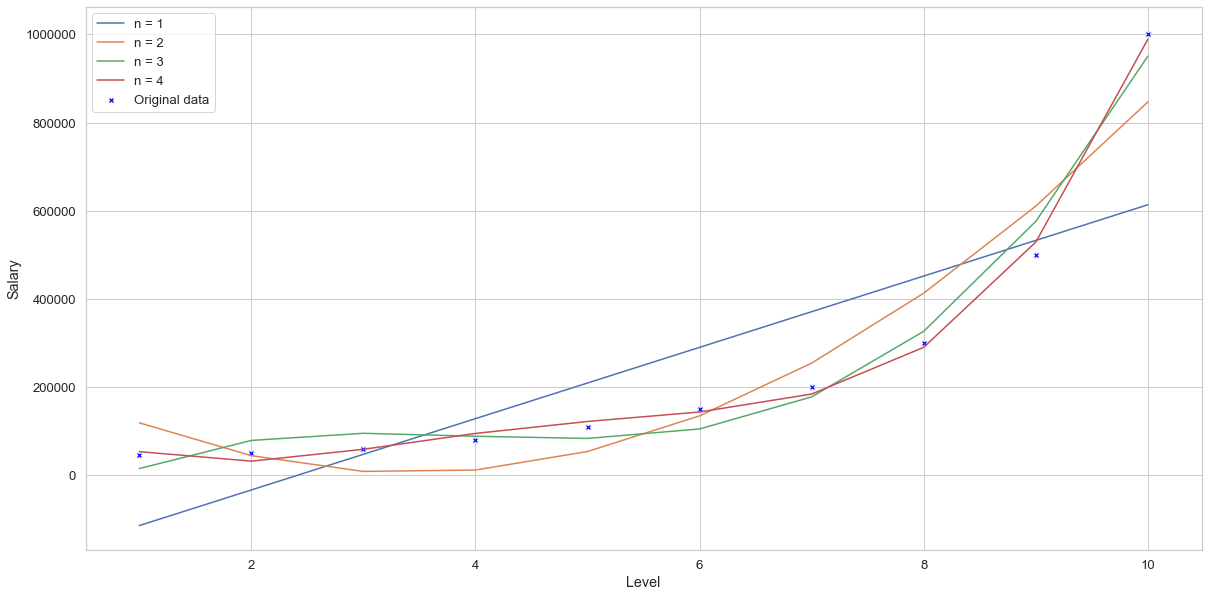

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20,10))
sns.set(style = 'whitegrid', font_scale = 1.2)

for ii in range(1,4+1):
        #PLotting the straight line predicted by lin2 object.
        plt.plot(X, polyfit_summary[ii], label = 'n = %i' %ii)

sns.scatterplot(x = dataset.Level, y = dataset.Salary, color = 'blue', marker = 'X', label = 'Original data')


plt.legend()
plt.show()

C:\Users\acer\PycharmProjects\untitled\venv\lib\site-packages\seaborn\algorithms.py:88: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\acer\PycharmProjects\untitled\venv\lib\site-packages\seaborn\algorithms.py:88: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\acer\PycharmProjects\untitled\venv\lib\site-packages\seaborn\algorithms.py:88: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\acer\PycharmProjects\untitled\venv\lib\site-packages\seaborn\algorithms.py:88: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\acer\PycharmProjects\untitled\venv\lib\site-packages\seaborn\algorithms.py:88: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\acer\PycharmProjects\untitled\venv\lib\site-packages\seaborn\algorithms.py:88: RankWar

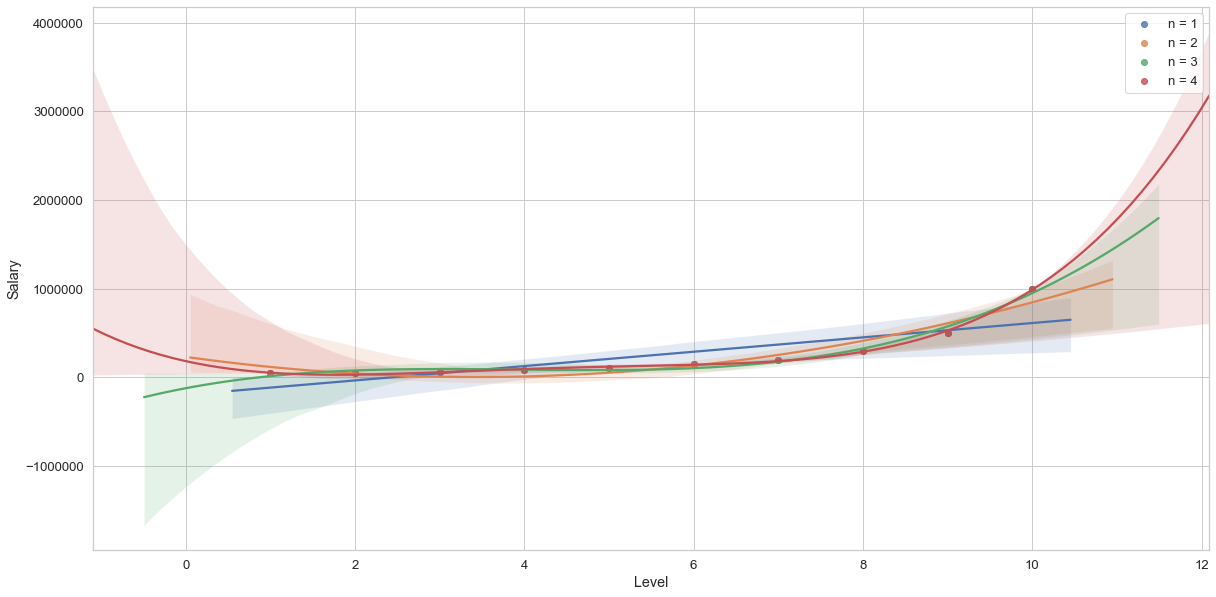

In [133]:
plt.figure(figsize = (20,10))
sns.set(style = 'whitegrid', font_scale = 1.2)

for ii in range(1,4+1):
    sns.regplot(dataset.Level, dataset.Salary, order = ii, label = "n = %i" %ii)
plt.legend()    
plt.show()

### Making Predictions.

In [141]:
def predictor(jj,n = 1):
    # Making the model once again.
    poly_model = PolynomialFeatures(degree = n)
    X_poly = poly_model.fit_transform(X)
    poly_model.fit(X_poly, y)

    lin2 = LinearRegression()
    lin2.fit(X_poly,y)
    temp = lin2.predict(poly_model.fit_transform(np.array([[jj]]))).round(2)   # returns a 2D array (1 X 1 matrix).
    return temp[0]

predictor(6.5,2)

189498.11

### Better format.

In [130]:
def modified_predictor(jj, n = 1):
    '''Returns a dataframe with predicted values for order 1,2,3,...,n.
        Here, 
            jj = value of the independent variable.
            n = order of the polynomial function.
    '''
    df = pd.DataFrame()
    
    for ii in range(1,n+1):
        poly_model = PolynomialFeatures(degree = ii)
        X_poly = poly_model.fit_transform(X)
        poly_model.fit(X_poly, y)

        lin2 = LinearRegression()
        lin2.fit(X_poly,y)
        temp = lin2.predict(poly_model.fit_transform(np.array( [[jj]] ))).round(2)   # returns a 2D array (1 X 1 matrix).
        
        df[ii] = temp
        
    return df

modified_predictor(6.5,5)


,1,2,3,4,5
0,330378.79,189498.11,133259.47,158862.45,174878.08


#### A handy way to minimize the warning signs.
<p>Source: <a href = 'https://stackoverflow.com/questions/9031783/hide-all-warnings-in-ipython'>Stack Overflow</a></p>

In [159]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

#### Finally, a summarized figure.

C:\Users\acer\PycharmProjects\untitled\venv\lib\site-packages\seaborn\algorithms.py:88: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\acer\PycharmProjects\untitled\venv\lib\site-packages\seaborn\algorithms.py:88: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\acer\PycharmProjects\untitled\venv\lib\site-packages\seaborn\algorithms.py:88: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\acer\PycharmProjects\untitled\venv\lib\site-packages\seaborn\algorithms.py:88: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\acer\PycharmProjects\untitled\venv\lib\site-packages\seaborn\algorithms.py:88: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\acer\PycharmProjects\untitled\venv\lib\site-packages\seaborn\algorithms.py:88: RankWar

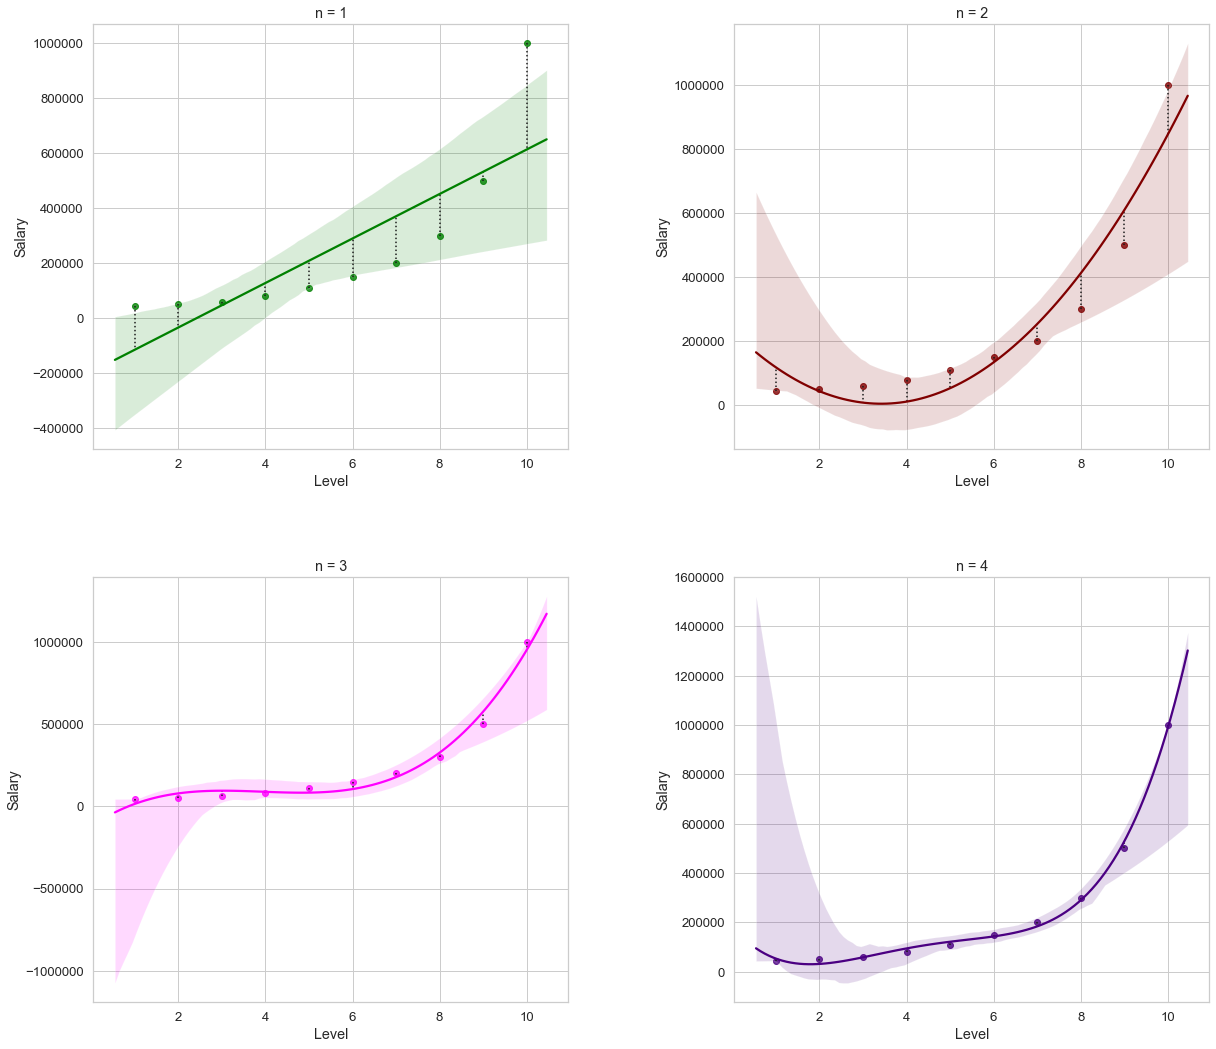

In [160]:
plt.figure(figsize = (20,18))
sns.set(style = 'whitegrid', font_scale = 1.2)
plt.subplots_adjust(wspace = 0.35, hspace = 0.3)

colors = ['lightred', 'green', 'maroon', 'magenta', 'indigo']

for ii in range(1,4+1):
    plt.subplot(2,2,ii)
    sns.regplot(dataset.Level, dataset.Salary, order = ii, color = colors[ii])
    
    for jj in range(len(y)):
        plt.vlines(X[jj], y[jj], predictor(dataset['Level'][jj],ii), linestyles = 'dotted')
    
    plt.title('n = %i' %ii)
        
plt.show()

##### Conclusion:
<p>It seems the polynomial fit of order 4 is the best fit to model the regression.</p>

# The End.